In [6]:
import tensorflow as tf
from utils import *


In [7]:
train_ds, valid_ds = load_dataset_tensorflow(subset="both",validation_split=0.2)

Found 1650 files belonging to 2 classes.
Using 1320 files for training.
Using 330 files for validation.


In [4]:
def get_base_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Rescaling(1./255))
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D())
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(5, activation='softmax'))
    return model


In [5]:
model = get_base_model()
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])
history = model.fit(train_ds, validation_data=valid_ds, epochs=2)

Epoch 1/2


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 2), output.shape=(None, 5)

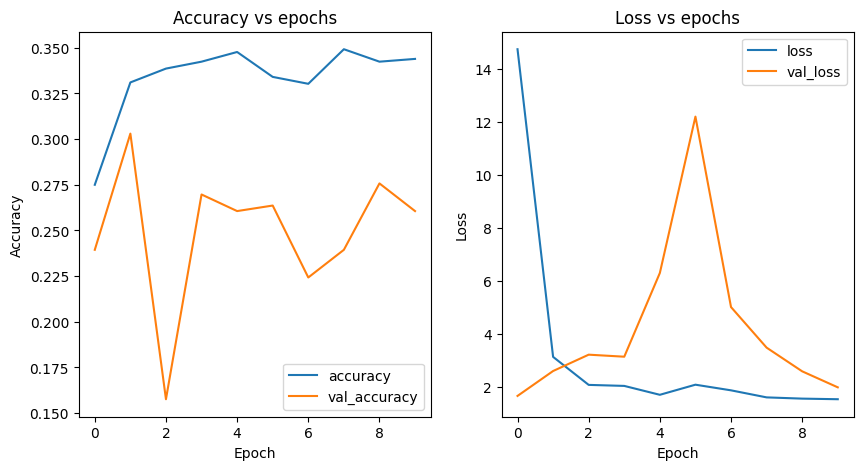

In [ ]:
plot_acc_loss(history)